In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Tue Dec  7 16:20:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install albumentations==1.0.3

# YOLOV3

In [54]:
# train v3 model
!python /content/drive/MyDrive/yolov3/yolov3-master/train.py --data /content/drive/MyDrive/yolov3/dataset.yaml --weights yolov3.pt --img 640 --epochs 25

wandb: Currently logged in as: disastro (use `wandb login --relogin` to force relogin)
train: weights=yolov3.pt, cfg=, data=/content/drive/MyDrive/yolov3/dataset.yaml, hyp=drive/MyDrive/yolov3/yolov3-master/data/hyps/hyp.scratch.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=drive/MyDrive/yolov3/yolov3-master/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov3
YOLOv3 🚀 2021-12-1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs

In [57]:
# detect v3 model
!python /content/drive/MyDrive/yolov3/yolov3-master/detect.py --weights /content/drive/MyDrive/yolov3/yolov3-master/runs/train/exp/weights/last.pt --source /content/drive/MyDrive/yolov3/dataset/test/test_images --save-txt --img 640 --max-det 2

detect: weights=['/content/drive/MyDrive/yolov3/yolov3-master/runs/train/exp/weights/last.pt'], source=/content/drive/MyDrive/yolov3/dataset/test/test_images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=2, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/yolov3/yolov3-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 2021-12-1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients
image 1/250 /content/drive/MyDrive/yolov3/dataset/test/test_images/0001.png: 640x640 2 ears, Done. (0.180s)
image 2/250 /content/drive/MyDrive/yolov3/dataset/test/test_images/0002.png: 640x640 2 ears, Done. (0.169s)
image 3/250 /content/drive/MyDrive/yolov3/dataset/test/test_images/0003.png: 640x640 2 ears

# YOLOV5

In [ ]:
1/0
# train v5 model
!python /content/drive/MyDrive/yolov3/yolov5-master/train.py --data /content/drive/MyDrive/yolov3/dataset.yaml --weights yolov5s.pt --img 640 --epochs 25

In [ ]:
1/0
# detect v5 model
!python /content/drive/MyDrive/yolov3/yolov5-master/detect.py --weights /content/drive/MyDrive/yolov3/yolov5-master/runs/train/exp/weights/best.pt --source /content/drive/MyDrive/yolov3/dataset/test/test_images --save-txt --img 640 --max-det 2

# CALCULATE IOU

In [44]:
import numpy as np
import cv2
def get_annotations(annot_name):
        with open(annot_name) as f:
            lines = f.readlines()
            annot = []
            for line in lines:
                l_arr = line.split(" ")[1:5]
                l_arr = [float(i) for i in l_arr]
                l_arr[0] *= 480
                l_arr[2] *= 480
                l_arr[1] *= 360
                l_arr[3] *= 360
                l_arr = [int(i) for i in l_arr]
                annot.append(l_arr)
        return annot
def prepare_for_detection( prediction, ground_truth):
        # For the detection task, convert Bounding-boxes to masked matrices (0 for background, 1 for the target). If you run segmentation, do not run this function

        if len(prediction) == 0:
            return [], []

        # Large enough size for base mask matrices:
        shape = 2*max(np.max(prediction), np.max(ground_truth)) 
        
        p = convert2mask(prediction, shape)
        gt = convert2mask(ground_truth, shape)

        return p, gt
def convert2mask(mt, shape):
    # Converts coordinates of bounding-boxes into blank matrix with values set where bounding-boxes are.

    t = np.zeros([shape, shape])
    for m in mt:
        x, y, w, h = m
        cv2.rectangle(t, (x,y), (x+w, y+h), 1, -1)
    return t

def iou_compute( p, gt):
    # Computes Intersection Over Union (IOU)
    if len(p) == 0:
        return 0
    intersection = np.logical_and(p, gt)
    union = np.logical_or(p, gt)

    iou = np.sum(intersection) / np.sum(union)

    return iou

In [52]:
import matplotlib.pyplot as plt
from sklearn import metrics
def prec_recall(iou_list, n_ground_truth=250, name=""):
    ps, rs = [],[]
    for i in range(11):
        limit = i/10
        tp, fp, fn = 0, 0, 0
        for iou in iou_list:
            if iou >= limit: tp += 1
            elif iou < limit and iou != 0: fp += 1
            else: fn += 1
        p, r = tp/(tp+fp), tp/n_ground_truth
        ps.append(p)
        rs.append(r)
    areaPR = metrics.auc(rs, ps)
    plt.plot(rs,ps)
    plt.title(f"PR curve for {name}, area: 0.{int(areaPR*1000)}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
    print(areaPR)
    return ps, rs

## FOR v5

In [50]:
import glob, os
iou_arr = []
from tqdm import tqdm
lab_list = sorted(glob.glob("/content/drive/MyDrive/yolov3/yolov5-master/runs/detect/exp/labels" + "/*.txt", recursive=True))
for lab_file in tqdm(lab_list):
  f = open(lab_file, "r")
  lines = f.readlines()
  predictions = []
  for p in lines: 
    if len(p) > 5:
      p = p.replace("\n", "")
      cls, a, b, c, d = p.split(" ")
      temp = [float(i) for i in [a, b, c, d]]
      temp[0] *= 480
      temp[2] *= 480
      temp[1] *= 360
      temp[3] *= 360
      temp = [int(i) for i in temp]
      predictions.append(temp)
  f.close()

  f = os.path.join("/content/drive/MyDrive/yolov3/dataset/test/test_labels", lab_file.split("/")[-1])
  annot = get_annotations(f)
  p, gt = prepare_for_detection(predictions, annot)
  iou = iou_compute(p, gt)
  iou_arr.append(iou)
miou = np.average(iou_arr)
print("Average IOU:", f"{miou:.2%}")

100%|██████████| 245/245 [00:01<00:00, 128.09it/s]

Average IOU: 47.27%


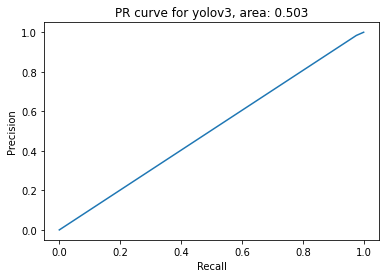

0.5039354838709678


([1.0,
  0.9838709677419355,
  0.9838709677419355,
  0.9516129032258065,
  0.907258064516129,
  0.3185483870967742,
  0.056451612903225805,
  0.04435483870967742,
  0.028225806451612902,
  0.0,
  0.0],
 [1.0, 0.976, 0.976, 0.944, 0.9, 0.316, 0.056, 0.044, 0.028, 0.0, 0.0])

In [60]:
prec_recall(iou_arr, 250, "yolov3")

## FOR v3

In [58]:
import glob, os
iou_arr = []
from tqdm import tqdm
lab_list = sorted(glob.glob("/content/drive/MyDrive/yolov3/yolov3-master/runs/detect/exp3/labels" + "/*.txt", recursive=True))
for lab_file in tqdm(lab_list):
  f = open(lab_file, "r")
  lines = f.readlines()
  predictions = []
  for p in lines: 
    if len(p) > 5:
      p = p.replace("\n", "")
      cls, a, b, c, d = p.split(" ")
      temp = [float(i) for i in [a, b, c, d]]
      temp[0] *= 480
      temp[2] *= 480
      temp[1] *= 360
      temp[3] *= 360
      temp = [int(i) for i in temp]
      predictions.append(temp)
  f.close()

  f = os.path.join("/content/drive/MyDrive/yolov3/dataset/test/test_labels", lab_file.split("/")[-1])
  annot = get_annotations(f)
  p, gt = prepare_for_detection(predictions, annot)
  iou = iou_compute(p, gt)
  iou_arr.append(iou)
miou = np.average(iou_arr)
print("Average IOU:", f"{miou:.2%}")

100%|██████████| 250/250 [00:01<00:00, 127.52it/s]

Average IOU: 47.87%
